<a href="https://colab.research.google.com/github/NidaBoy/computational-static-physics/blob/main/diseases_propagations_and_finites_automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniel Barreto Torers- 2018432952

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [ ]:
# Configurações iniciais
tamanho = 50  # Dimensão da matriz (50x50)
p_c = 0.3     # Probabilidade de contaminação
p_r_vals = np.linspace(0, 1, 11)  # Probabilidades de recuperação para análise
passos = 100  # Número de passos de tempo
realizacoes = 10  # Número de execuções para calcular médias

In [ ]:
# Função para encontrar vizinhos com condições de contorno periódicas
def vizinhos_periodicos(x, y, tamanho):
    return [(x-1) % tamanho, y], [(x+1) % tamanho, y], [x, (y-1) % tamanho], [x, (y+1) % tamanho]

# Atualização da rede com base nas regras do modelo SIR
def atualizar_rede(rede, p_c, p_r, tamanho):
    nova_rede = rede.copy()
    for x in range(tamanho):
        for y in range(tamanho):
            if rede[x, y] == 0:  # Suscetível
                for nx, ny in vizinhos_periodicos(x, y, tamanho):
                    if rede[nx, ny] == 1 and random.random() < p_c:
                        nova_rede[x, y] = 1
                        break
            elif rede[x, y] == 1:  # Infectado
                if random.random() < p_r:
                    nova_rede[x, y] = 2
    return nova_rede

# Simulação do modelo SIR
def simular_sir(tamanho, p_c, p_r, passos, realizacoes):
    resultados = []

    time = int(passos / 10)

    for _ in range(realizacoes):
        # Inicializa a rede: todos suscetíveis (0), exceto um infectado (1)
        rede = np.zeros((tamanho, tamanho), dtype=int)

        count = 0
        redes = []

        x, y = random.randint(0, tamanho-1), random.randint(0, tamanho-1)
        rede[x, y] = 1

        # Listas para armazenar populações ao longo do tempo
        suscetiveis, infectados, recuperados = [], [], []

        # Evolução temporal
        for i in range(passos):
            suscetiveis.append(np.sum(rede == 0))
            infectados.append(np.sum(rede == 1))
            recuperados.append(np.sum(rede == 2))
            rede = atualizar_rede(rede, p_c, p_r, tamanho)

            if count == time or i == 0:
                redes.append((i, rede.copy()))
                count = 0
            else:
                count += 1

        resultados.append((suscetiveis, infectados, recuperados, redes))
    return resultados

# Função para calcular médias das populações
def calcular_medias(resultados, passos):
    media_s = np.mean([r[0] for r in resultados], axis=0)
    media_i = np.mean([r[1] for r in resultados], axis=0)
    media_r = np.mean([r[2] for r in resultados], axis=0)
    return media_s, media_i, media_r

In [ ]:
# Visualização da evolução espacial da rede
def plotar_rede(rede, t):
    plt.imshow(rede, cmap="viridis", vmin=0, vmax=2)
    plt.colorbar(ticks=[0, 1, 2], label="Estados")
    plt.title(f"Distribuição espacial no passo {t}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

In [ ]:
# Simulação inicial com valores fixos de p_c e p_r
print("Simulando com p_c = 0.3 e p_r = 0.1...")
resultados = simular_sir(tamanho, p_c, 0.1, passos, realizacoes)

Simulando com p_c = 0.3 e p_r = 0.1...


In [ ]:
# Calcula médias
media_s, media_i, media_r = calcular_medias(resultados[:3], passos)

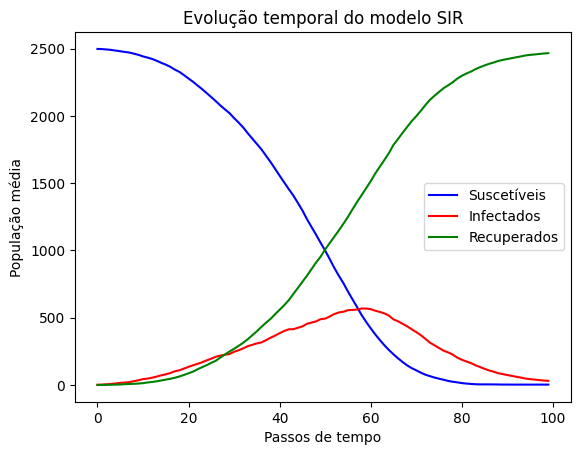

In [ ]:
# Gráficos de evolução temporal
plt.plot(media_s, label="Suscetíveis", color="blue")
plt.plot(media_i, label="Infectados", color="red")
plt.plot(media_r, label="Recuperados", color="green")
plt.legend()
plt.xlabel("Passos de tempo")
plt.ylabel("População média")
plt.title("Evolução temporal do modelo SIR")
plt.show()

# Simulação 1

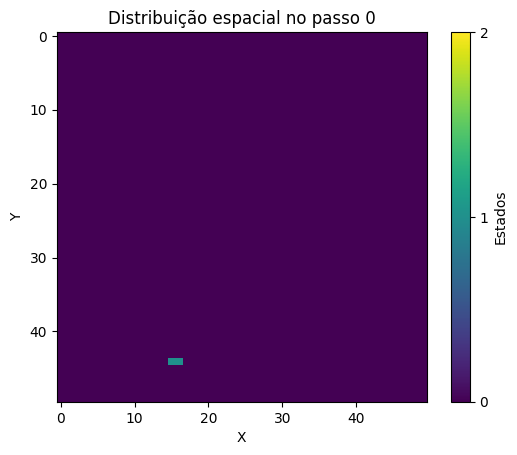

In [ ]:
# Exemplo de visualização espacial no último passo
plotar_rede(resultados[0][3][0][1], resultados[0][3][0][0])

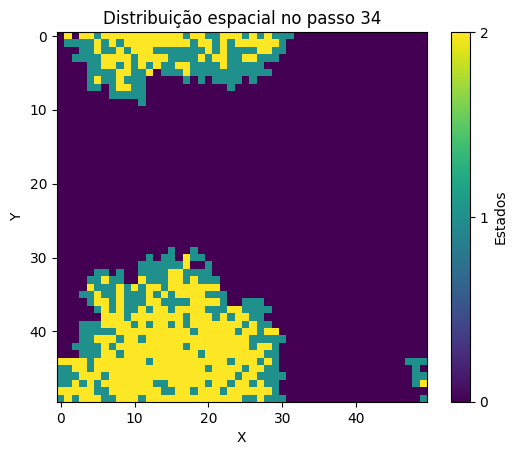

In [ ]:
plotar_rede(resultados[0][3][1][1], resultados[0][3][1][0])

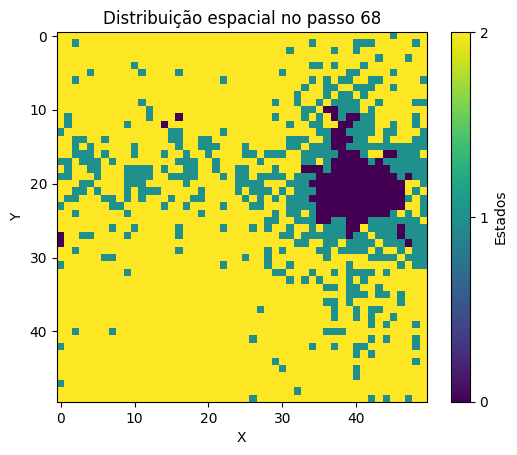

In [ ]:
plotar_rede(resultados[0][3][2][1], resultados[0][3][2][0])

# Simulação 2

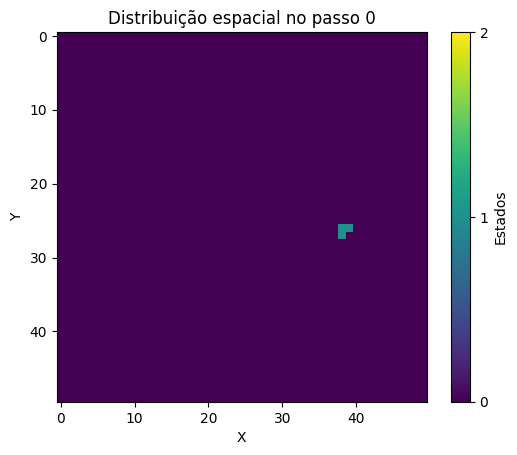

In [ ]:
plotar_rede(resultados[1][3][0][1], resultados[1][3][0][0])

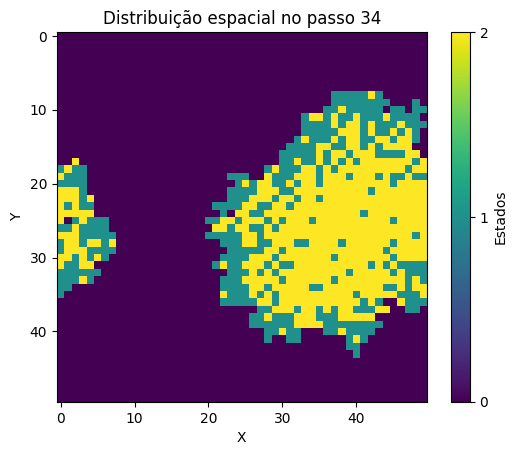

In [ ]:
plotar_rede(resultados[1][3][1][1], resultados[1][3][1][0])

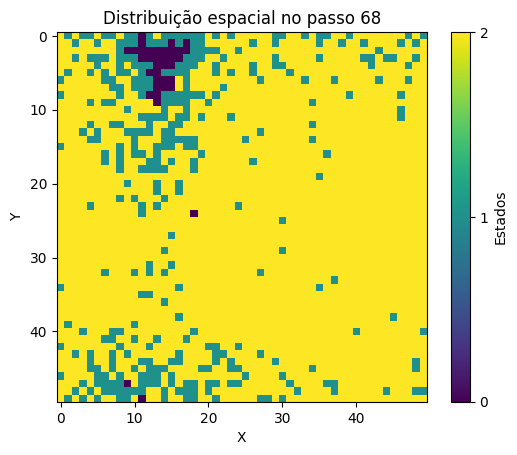

In [ ]:
plotar_rede(resultados[1][3][2][1], resultados[1][3][2][0])

# Simulação 3

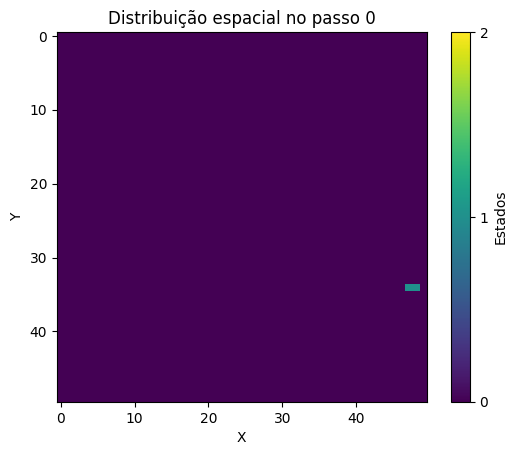

In [ ]:
plotar_rede(resultados[2][3][0][1], resultados[2][3][0][0])

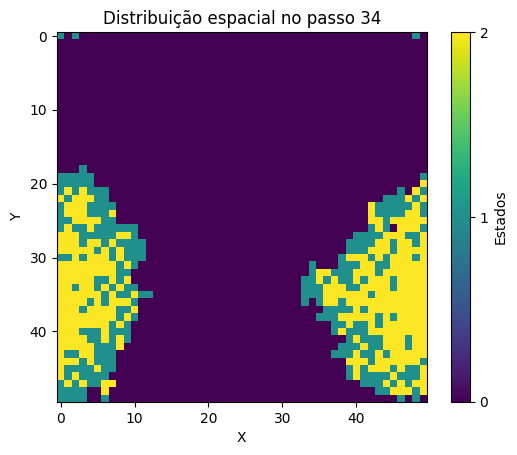

In [ ]:
plotar_rede(resultados[2][3][1][1], resultados[2][3][1][0])

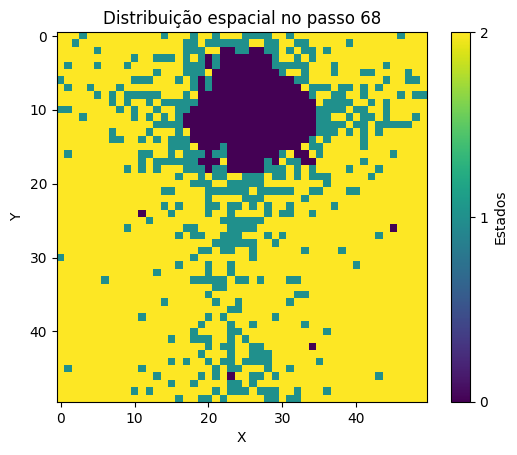

In [ ]:
plotar_rede(resultados[2][3][2][1], resultados[2][3][2][0])

Essas simulações mantiveram os hiperparâmetros fixos, por isso observa-se  um comportamento padrão

# Variando hiperparâmetros

# Simulação 1

Lado quadrado(50)

Probabilidade contaminação(0.8)

Probabilidade recuperação(0.3)

Tempo(200)

In [ ]:
# Configurações iniciais
tamanho = 50  # Dimensão da matriz (50x50)
p_c = 0.8     # Probabilidade de contaminação
p_r_vals = np.linspace(0, 1, 11)  # Probabilidades de recuperação para análise
passos = 200  # Número de passos de tempo
realizacoes = 10  # Número de execuções para calcular médias
pr = 0.3

In [ ]:
# Simulação inicial com valores fixos de p_c e p_r
resultados = simular_sir(tamanho, p_c, pr, passos, realizacoes)

In [ ]:
# Calcula médias
media_s, media_i, media_r = calcular_medias(resultados[:3], passos)

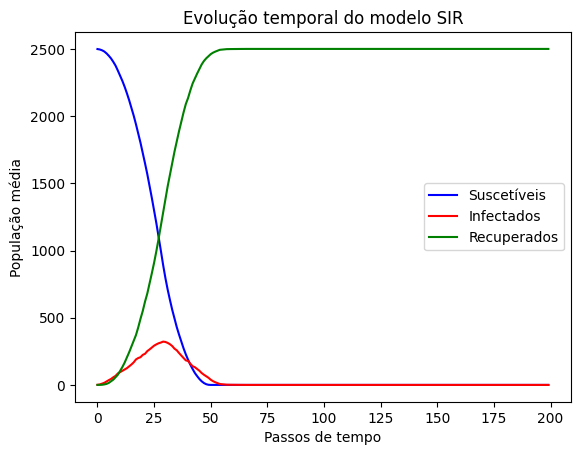

In [ ]:
# Gráficos de evolução temporal
plt.plot(media_s, label="Suscetíveis", color="blue")
plt.plot(media_i, label="Infectados", color="red")
plt.plot(media_r, label="Recuperados", color="green")
plt.legend()
plt.xlabel("Passos de tempo")
plt.ylabel("População média")
plt.title("Evolução temporal do modelo SIR")
plt.show()

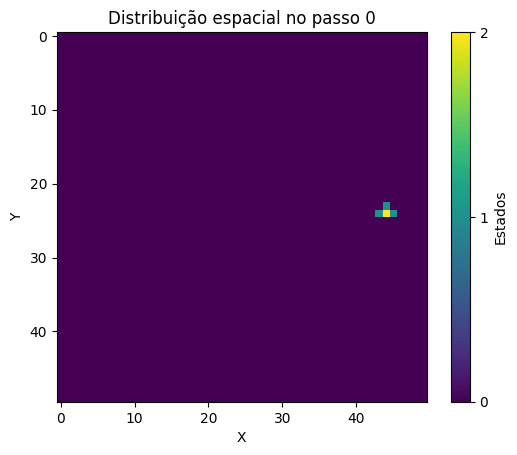

In [ ]:
plotar_rede(resultados[2][3][0][1], resultados[2][3][0][0])

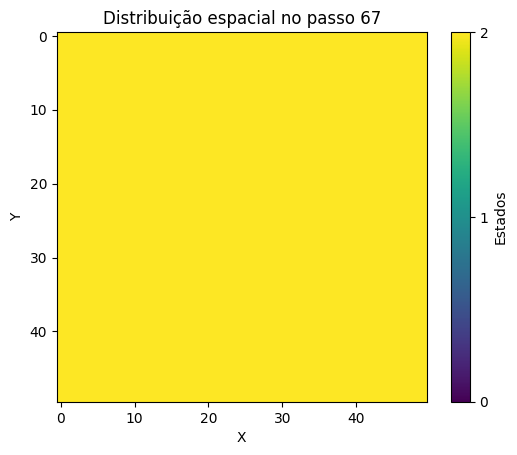

In [ ]:
plotar_rede(resultados[2][3][1][1], resultados[2][3][1][0])

# Simulação 2

Lado quadrado(100)

Probabilidade contaminação(0.8)

Probabilidade recuperação(0.3)

Tempo(200)

In [ ]:
# Configurações iniciais
tamanho = 100  # Dimensão da matriz (50x50)
p_c = 0.8     # Probabilidade de contaminação
p_r_vals = np.linspace(0, 1, 11)  # Probabilidades de recuperação para análise
passos = 200  # Número de passos de tempo
realizacoes = 10  # Número de execuções para calcular médias
pr = 0.3

In [ ]:
# Simulação inicial com valores fixos de p_c e p_r
resultados = simular_sir(tamanho, p_c, pr, passos, realizacoes)

In [ ]:
# Calcula médias
media_s, media_i, media_r = calcular_medias(resultados[:3], passos)

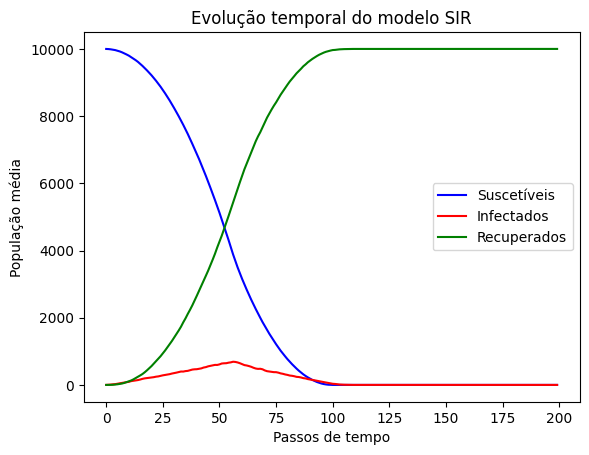

In [ ]:
# Gráficos de evolução temporal
plt.plot(media_s, label="Suscetíveis", color="blue")
plt.plot(media_i, label="Infectados", color="red")
plt.plot(media_r, label="Recuperados", color="green")
plt.legend()
plt.xlabel("Passos de tempo")
plt.ylabel("População média")
plt.title("Evolução temporal do modelo SIR")
plt.show()

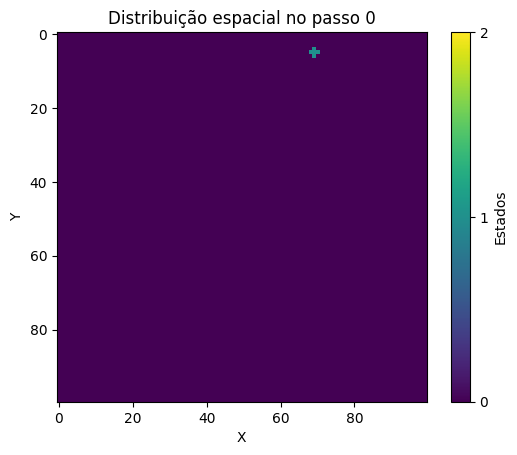

In [ ]:
plotar_rede(resultados[2][3][0][1], resultados[2][3][0][0])

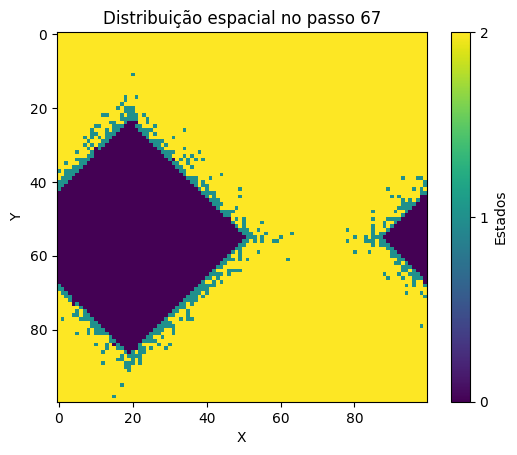

In [ ]:
plotar_rede(resultados[2][3][1][1], resultados[2][3][1][0])

# Simulação 3

Lado quadrado(50)

Probabilidade contaminação(0.05)

Probabilidade recuperação(0.3)

Tempo(200)

In [ ]:
# Configurações iniciais
tamanho = 50  # Dimensão da matriz (50x50)
p_c = 0.05    # Probabilidade de contaminação
p_r_vals = np.linspace(0, 1, 11)  # Probabilidades de recuperação para análise
passos = 200  # Número de passos de tempo
realizacoes = 10  # Número de execuções para calcular médias
pr = 0.3

In [ ]:
# Simulação inicial com valores fixos de p_c e p_r
resultados = simular_sir(tamanho, p_c, pr, passos, realizacoes)

In [ ]:
# Calcula médias
media_s, media_i, media_r = calcular_medias(resultados[:3], passos)

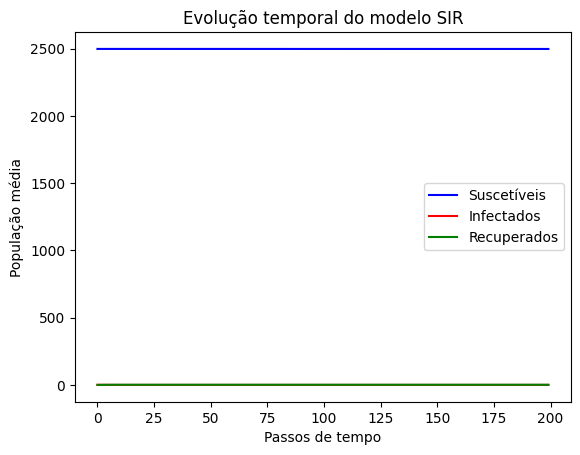

In [ ]:
# Gráficos de evolução temporal
plt.plot(media_s, label="Suscetíveis", color="blue")
plt.plot(media_i, label="Infectados", color="red")
plt.plot(media_r, label="Recuperados", color="green")
plt.legend()
plt.xlabel("Passos de tempo")
plt.ylabel("População média")
plt.title("Evolução temporal do modelo SIR")
plt.show()

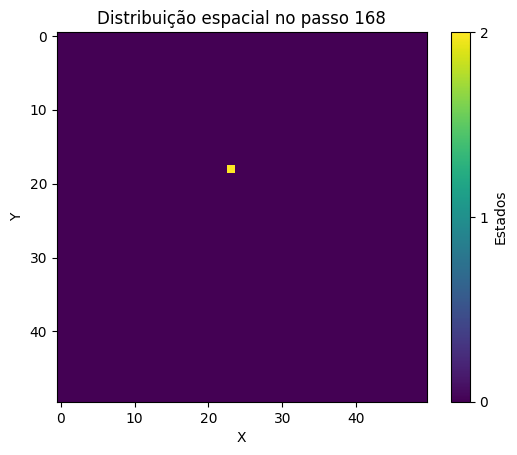

In [ ]:
plotar_rede(resultados[2][3][8][1], resultados[2][3][8][0])

# Simulação 4

Lado quadrado(50)

Probabilidade contaminação(0.8)

Probabilidade recuperação(0.01)

Tempo(800)

In [ ]:
# Configurações iniciais
tamanho = 50  # Dimensão da matriz (50x50)
p_c = 0.8    # Probabilidade de contaminação
p_r_vals = np.linspace(0, 1, 11)  # Probabilidades de recuperação para análise
passos = 800  # Número de passos de tempo
realizacoes = 10  # Número de execuções para calcular médias
pr = 0.01

In [ ]:
# Simulação inicial com valores fixos de p_c e p_r
resultados = simular_sir(tamanho, p_c, pr, passos, realizacoes)

In [ ]:
# Calcula médias
media_s, media_i, media_r = calcular_medias(resultados[:3], passos)

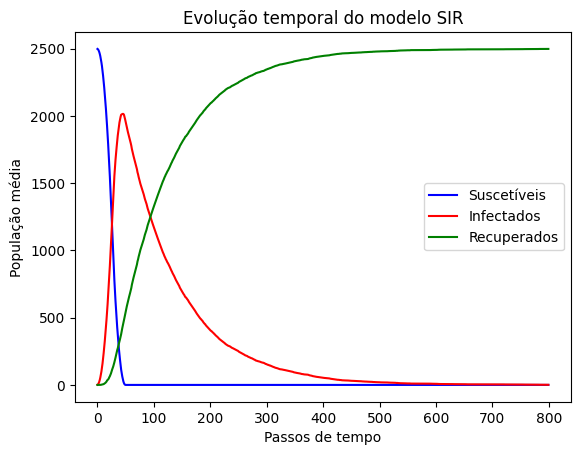

In [ ]:
# Gráficos de evolução temporal
plt.plot(media_s, label="Suscetíveis", color="blue")
plt.plot(media_i, label="Infectados", color="red")
plt.plot(media_r, label="Recuperados", color="green")
plt.legend()
plt.xlabel("Passos de tempo")
plt.ylabel("População média")
plt.title("Evolução temporal do modelo SIR")
plt.show()

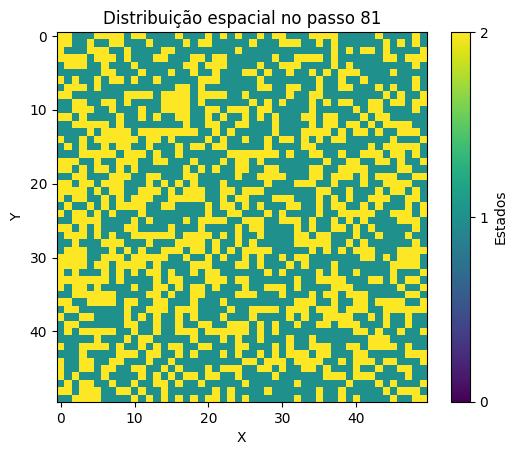

In [ ]:
plotar_rede(resultados[2][3][1][1], resultados[2][3][1][0])

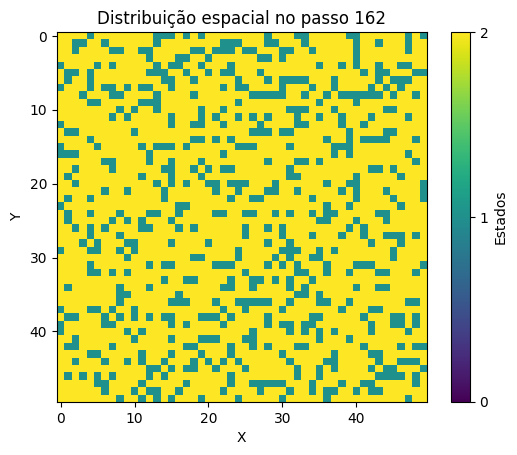

In [ ]:
plotar_rede(resultados[2][3][2][1], resultados[2][3][2][0])

# Simulação 5

Lado quadrado(50)

Probabilidade contaminação(0.3)

Probabilidade recuperação(0.7)

Tempo(200)

In [ ]:
# Configurações iniciais
tamanho = 50  # Dimensão da matriz (50x50)
p_c = 0.3    # Probabilidade de contaminação
p_r_vals = np.linspace(0, 1, 11)  # Probabilidades de recuperação para análise
passos = 200  # Número de passos de tempo
realizacoes = 10  # Número de execuções para calcular médias
pr = 0.7

In [ ]:
# Simulação inicial com valores fixos de p_c e p_r
resultados = simular_sir(tamanho, p_c, pr, passos, realizacoes)

In [ ]:
# Calcula médias
media_s, media_i, media_r = calcular_medias(resultados[:3], passos)

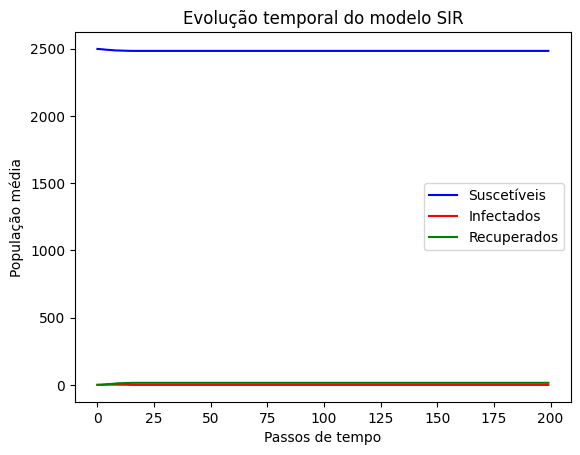

In [ ]:
# Gráficos de evolução temporal
plt.plot(media_s, label="Suscetíveis", color="blue")
plt.plot(media_i, label="Infectados", color="red")
plt.plot(media_r, label="Recuperados", color="green")
plt.legend()
plt.xlabel("Passos de tempo")
plt.ylabel("População média")
plt.title("Evolução temporal do modelo SIR")
plt.show()

# Conclusões

No estudo base ([1]), com um lado do quadrado de 50, uma probabilidade de contaminação de 0.8 e uma probabilidade de recuperação de 0.3, observou-se um pico de infectados em torno do tempo 25, com o número de suscetíveis caindo para zero por volta do tempo 50. Este comportamento indica uma rápida disseminação do contágio seguida por uma recuperação eficiente da população.

Quando os mesmos parâmetros foram mantidos, mas o tamanho do lado do quadrado foi dobrado para 100 ([2]), o aumento e o decréscimo do número de infectados ocorreram mais lentamente. O pico de infectados foi atingido aproximadamente no tempo 50. Esse resultado sugere que, em uma população maior, a propagação da doença ocorre de forma mais gradual, provavelmente devido ao maior número de interações necessárias para que o contágio se espalhe por toda a população.

Ao reduzir drasticamente a taxa de contaminação para 0.05 ([3]), observou-se que poucas infecções ocorreram e a população suscetível permaneceu quase constante, próxima da população total. A população de recuperados e infectados foi praticamente nula, indicando que uma baixa taxa de contaminação impede a disseminação significativa da doença.

Em um cenário onde a probabilidade de contaminação foi aumentada para 0.8 e a probabilidade de recuperação foi reduzida para 0.01 ([4]), o pico de infectados foi significativamente maior e a estabilização do modelo, com o número de suscetíveis e infectados chegando a zero, ocorreu após um período muito mais longo, necessário para que todos os indivíduos se recuperassem ou fossem infectados.

Por fim, ao ajustar a probabilidade de contaminação para 0.3 e a probabilidade de recuperação para 0.7 ([5]), não houve muitas contaminações. A população suscetível manteve-se muito próxima da população total, enquanto as populações de recuperados e infectados permaneceram quase nulas. Esse cenário demonstra que uma alta taxa de recuperação e uma taxa moderada de contaminação resultam em uma baixa prevalência da doença.

É evidente que a taxa de contaminação e a taxa de recuperação são fatores cruciais na determinação do comportamento da doença. Uma alta taxa de contaminação combinada com uma baixa taxa de recuperação pode resultar em surtos severos e prolongados, enquanto o inverso pode praticamente suprimir a disseminação da doença. Além disso, o tamanho da população influencia a velocidade com que a doença se espalha, com populações maiores exibindo uma disseminação mais lenta mas potencialmente mais prolongada.